# Bitly data from USA.gov

Example 13.1 in Python for Data Analysis

Loading Data from the [repository](https://github.com/wesm/pydata-book/tree/3rd-edition)

In [59]:
path = "example.txt"

with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [60]:
import json

In [61]:
with open(path) as f:
    records = [json.loads(line) for line in f]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

## Counting time zones in pure python

In [62]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]

In [63]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

Leave the empties for now.

Two approaches will be used, first the hard way with standard libraries, then with Pandas

In [64]:
def get_counts(sequence): 
    counts = {}
    for x in sequence: 
        if x in counts: 
            counts[x] += 1
        else: 
            counts[x] = 1
    return counts
    

__The same, using defaultdict which will initialize values to 0__

In [65]:
from collections import defaultdict

def get_counts2(sequence): 
    counts = defaultdict(int)
    for x in sequence: 
        counts[x] += 1
    return counts

In [66]:
counts = get_counts(time_zones)

In [67]:
counts["America/New_York"]

1251

In [68]:
len(time_zones)

3440

Make a sorted list of tuples to find the top 10.

In [69]:
def top_counts(count_dict, n = 10): 
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [70]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

__The same, using `collections.Counter`__

In [71]:
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [72]:
import pandas as pd

In [73]:
frame = pd.DataFrame(records)

In [74]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [75]:
frame.head(5)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [76]:
frame["tz"].head(5)

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [77]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [78]:
clean_tz = frame["tz"].fillna("Missing")

In [79]:
clean_tz.head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [80]:
clean_tz [clean_tz == ""] = "Unkown"

In [81]:
tz_counts = clean_tz.value_counts()

In [82]:
tz_counts.head()

tz
America/New_York       1251
Unkown                  521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [83]:
import seaborn as sns

<Axes: ylabel='tz'>

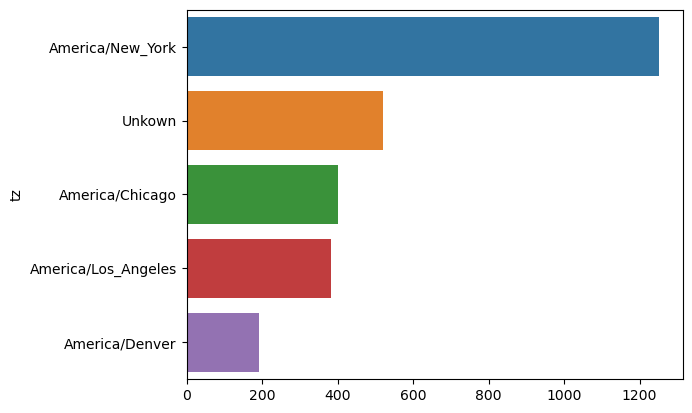

In [84]:
subset = tz_counts.head()
sns.barplot(y = subset.index, x=subset.to_numpy(), hue=subset.index)

In [85]:
frame["a"][1:5]

1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [86]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [87]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [88]:
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [89]:
cframe = frame[frame["a"].notna()].copy()

In [90]:
import numpy as np 

cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")


In [91]:
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [92]:
by_tz_os = cframe.groupby(["tz", "os"])

In [93]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head(5)

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


`np.argsort()` returns an index of sorted values, eg. [1,3,2] would yield [0,2,1]

In [94]:
indexer = agg_counts.sum("columns").argsort()

In [95]:
indexer.values[:10]

array([ 8,  9, 11, 14, 87, 86, 21, 20, 56, 57])

In [96]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


The same, using pandas' `nlargest`.

In [97]:
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [98]:
count_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, America/Sao_Paulo to America/New_York
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Not Windows  10 non-null     float64
 1   Windows      10 non-null     float64
dtypes: float64(2)
memory usage: 240.0+ bytes


In [99]:
count_subset = count_subset.stack()

In [100]:
count_subset.info()

<class 'pandas.core.series.Series'>
MultiIndex: 20 entries, ('America/Sao_Paulo', 'Not Windows') to ('America/New_York', 'Windows')
Series name: None
Non-Null Count  Dtype  
--------------  -----  
20 non-null     float64
dtypes: float64(1)
memory usage: 790.0+ bytes


In [101]:
count_subset.name = "total"

In [102]:
count_subset = count_subset.reset_index()

In [103]:
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

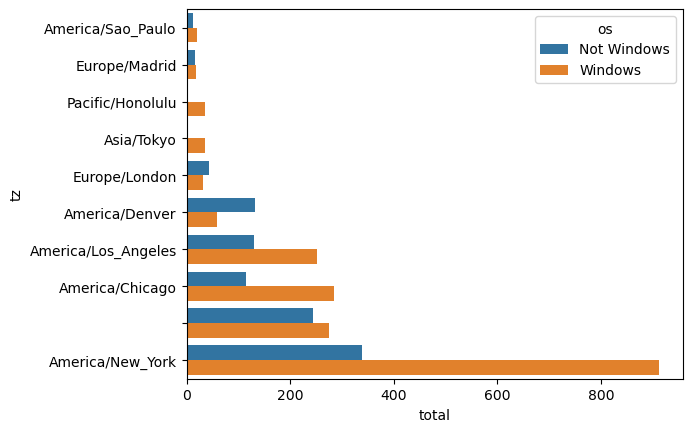

In [104]:
sns.barplot(x="total", y="tz", hue="os", data=count_subset)

__Normalize to show "smaller" ones better.__

In [105]:
def norm_total(group): 
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)

/tmp/ipykernel_653730/1713748549.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


<Axes: xlabel='normed_total', ylabel='tz'>

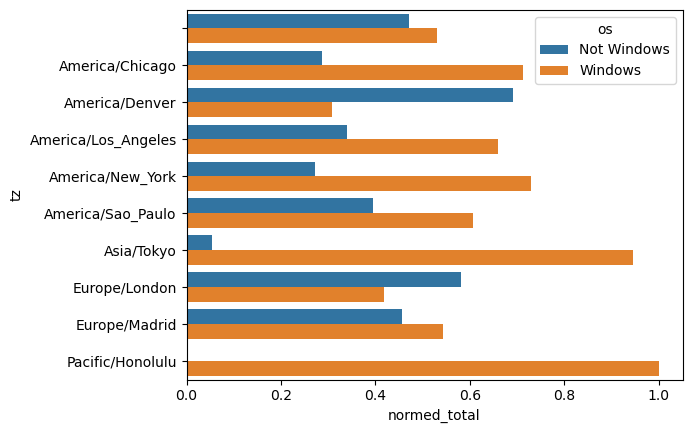

In [108]:
sns.barplot(x="normed_total", y="tz", hue="os", data=results)

In [109]:
g = count_subset.groupby("tz")

In [110]:
results2 = count_subset["total"] / g["total"].transform("sum")